lets now try out .... 


,Id,Location,To,From,Value
0,73159,Kristiinankatu,2018-07-23 22:00:00,2018-07-23 21:00:00,286
1,73159,Kristiinankatu,2018-07-23 23:00:00,2018-07-23 22:00:00,178
2,73159,Kristiinankatu,2018-07-24 00:00:00,2018-07-23 23:00:00,188
3,73159,Kristiinankatu,2018-07-24 01:00:00,2018-07-24 00:00:00,135
4,73159,Kristiinankatu,2018-07-24 02:00:00,2018-07-24 01:00:00,35


,Id,Location,To,From,Value
9584,73161,Kävelykatu,2018-07-23 21:00:00,2018-07-23 20:00:00,22
9585,73161,Kävelykatu,2018-07-23 22:00:00,2018-07-23 21:00:00,213
9586,73161,Kävelykatu,2018-07-23 23:00:00,2018-07-23 22:00:00,59
9587,73161,Kävelykatu,2018-07-24 00:00:00,2018-07-23 23:00:00,75
9588,73161,Kävelykatu,2018-07-24 01:00:00,2018-07-24 00:00:00,79


['2018', '07', '24', '00', '00', '00']


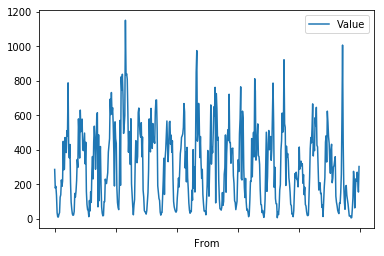

(9219, 5)


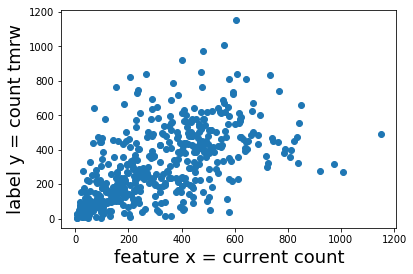

In [6]:
import pandas as pd # import Pandas library (and defining shorthand "pd") for reading and manipulating the data files
from matplotlib import pyplot as plt # import and define shorthand "plt" for library "pyplot" providing plotting functions
from IPython.display import display, HTML
import numpy as np   # import and define shorthand "np" for library "numpy" for advanced mathematical operations in python
from pymc3 import  *
import time
import re
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#cmpd = ['orangered','dodgerblue','springgreen']
#read in data from csv files 
#parse_dates function is used on Date-column to change them from string to date-object

#data = pd.read_csv("https://users.aalto.fi/~junga1/Weather/WetterData.csv",sep='\t')
#data1 = pd.read_csv("https://users.aalto.fi/~junga1/Weather/WetterDataMissing.csv",sep='\t')
data =  pd.read_csv("https://raw.githubusercontent.com/alexjungaalto/PythonPlayground/master/pedestriandata.csv",sep=',')

df_Krist = data[data['Location'] == "Kristiinankatu"]
df_Kave = data[data['Location'] == "Kävelykatu"]


## Show top rows of each file.
display(HTML(df_Krist.head(5).to_html(max_rows=5)))
display(HTML(df_Kave.head(5).to_html(max_rows=5)))

#features = data.Value.values;  
#datum = data.From.values; 
#hours = re.split('-| |:',datum)[3]

#print(data[0])

print(re.split('-| |:',datum[3]))
#df_filtered = df_filtered[1:100,]
today = df_Krist.iloc[0:500, :]
tmrw = df_Krist.iloc[24:524, :]

today_Kave = df_Kave.iloc[0:500, :]
tmrw_Kave = df_Kave.iloc[24:524, :]

features=today.Value.values; 
labels = tmrw.Value.values ; 

today.plot(x='From', y='Value')
plt.show()
#features = data.R2.values; 
#labels = data.R4.values; 
plt.scatter(features,labels)
plt.xlabel('feature x = current count', fontsize=18)
plt.ylabel('label y = count tmrw', fontsize=18)

print(df_filtered.shape)


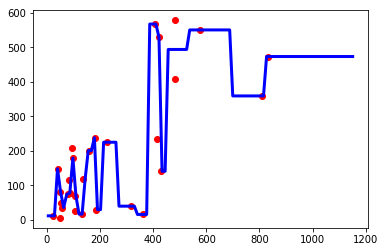

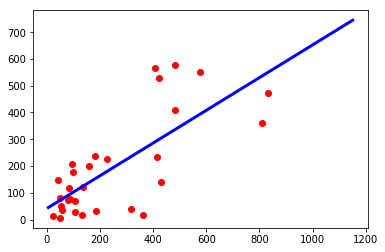

In [7]:
# Split the data into training/testing sets
X_train = features.reshape( -1, 1) 
X_test = features.reshape( -1, 1) 
# Split the targets into training/testing sets
y_train = labels
y_test = labels
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Split the targets into training/testing sets
X_train = features.reshape( -1, 1) 
X_test = features.reshape( -1, 1) 
y_train = labels
y_test = labels
X_train, y_train = shuffle(X_train, y_train)
X_train=X_train[:30,:]
y_train=y_train[:30]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
X_eval = np.linspace(min(features), max(features), 100, endpoint=True)[:, np.newaxis]

# Make predictions using the testing set
y_pred = regr.predict(X_eval)
#X = X_train; 
#Y = y_train; 
clf = DecisionTreeRegressor(max_depth=100)
clf.fit(X_train, y_train)

y_pred_tree = clf.predict(X_eval)

#plt.subplot(1, 2, 1)
#plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_eval, y_pred_tree, color='blue', linewidth=3)

#plt.subplot(1, 2, 2)
plt.figure()
#plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_eval, y_pred, color='blue', linewidth=3)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.016370e-28
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.988734e-18
  overwrite_a=True).T


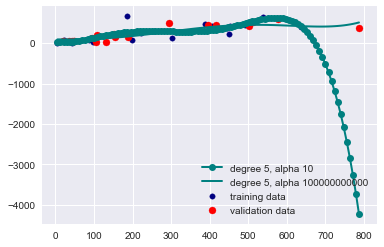

<Figure size 2880x720 with 0 Axes>

In [77]:
x = labels
y = features

X_train = features.reshape( -1, 1) 
X_test = features.reshape( -1, 1) 
y_train = labels
y_test = labels

samplesize=20

X, y = shuffle(X_train, y_train)
X=X[0:(2*samplesize):1,:]
y=y[0:(2*samplesize):1]
X_train=X[0:samplesize:1,:]
y_train=y[0:samplesize:1]
X_val=X[(samplesize):(2*samplesize):1,:]
y_val=y[(samplesize):(2*samplesize):1]


# create matrix versions of these arrays
X = x[:, np.newaxis]
#X_plot = x_plot[:, np.newaxis]

min_train = min(X_train) 
min_val = min(X_val)

max_train = max(X_train)
max_val = max(X_val)

X_eval = np.arange(min(min_train,min_val), max(max_train,max_val), 0.1)[:, np.newaxis]
X_eval = np.linspace(min(min_train,min_val), max(max_train,max_val), 100, endpoint=True)[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
#         label="ground truth")
plt.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training data")
plt.scatter(X_val, y_val,  color='red', label="validation data")


for (mark_plot,reg, degree) in [('o',10,5),('+',100000000000,5)]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=reg))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_eval)
    plt.plot(X_eval, y_plot, color=colors[0],marker=mark_plot,linewidth=lw,label="degree %d, alpha %d" % (degree, reg))

    
plt.legend(loc='lower right')

plt.figure(figsize=(40,10))
plt.show()

In [23]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.5


In [13]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

In [14]:
model.basic_RVs

[mu, obs]

In [19]:

with pm.Model() as model:
    mu = pm.Normal('y', mu=0, sd=1)
    obs = pm.Normal('x', mu=mu, sd=1, observed=np.random.randn(100))

    step = pm.Metropolis()
    trace = pm.sample(1000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [y]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:04<00:00, 667.20draws/s]
The number of effective samples is smaller than 25% for some parameters.


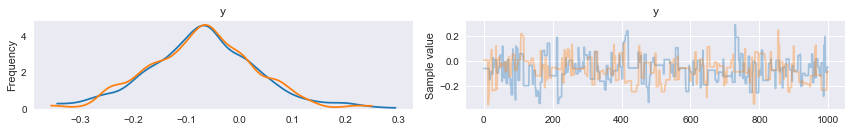

In [20]:
pm.traceplot(trace);

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility

# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables

X_train = features.reshape( -1, 1) 
y_train=labels.reshape(-1,1)

X_train, y_train = shuffle(X_train, labels)
X=X_train[:30,:]
Y=y_train[:30]


# create model

#model = Sequential()
#model.add(Dense(40, input_dim=1, init='uniform', activation='relu'))
#model.add(Dense(40, init='uniform', activation='relu'))
#model.add(Dense(1, init='uniform'))

model = Sequential()
model.add(Dense(1000, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
    
    
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=200, batch_size=X.shape[0] ,  verbose=0)
# calculate predictions
predictions = model.predict(X_eval)
plt.scatter(X, Y,  color='red')
plt.plot(X_eval, predictions, color='blue', linewidth=3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 5
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.rcParams.update({'font.size': 22})
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"$h(x)y$")
#plt.ylabel("$L(y=1, f(x))$")
plt.show()



In [ ]:
plt.plot(xx, xx** 2, color='teal', lw=lw,
         label="Hinge loss")
plt.xlabel(r"$y - h(x)$")